<a href="https://colab.research.google.com/github/erikjskie/ensemblemerge_manuscript/blob/main/Supplementary_Fig6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(magrittr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fig1.csv")
dat = read.table(file = "skiex003/datasets/EnsembleMerge/fig1.csv", header = T, sep = ",")
nData = dat$Datasets %>% unique() %>% length()
nMethod = dat$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
dat$method = factor(dat$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
dat$score_method = factor(dat$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
dat %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum))
dat %<>% filter(method == "EnsembleMerge")
dat$Method = "Standard"

system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/latent_ensemblemerge.csv")
latent = read.table(file = "skiex003/datasets/EnsembleMerge/latent_ensemblemerge.csv", header = T, sep = ",")
nData = latent$Datasets %>% unique() %>% length()
nMethod = latent$method %>% unique() %>% length()
range0_1 <- function(x){x/(nData*nMethod)}
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
latent$method = factor(latent$method, levels = c("EnsembleMerge", "Seurat", "Harmony", "Scanorama", "BBKNN", "Liger", "Uncorrected"))
latent$score_method = factor(latent$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
latent %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum))
latent %<>% filter(method == "EnsembleMerge")
latent$Method = "Latent"

dat = rbind(dat, latent)
dat$Method = factor(dat$Method, levels = c("Standard", "Latent")) 
dat %>% head(n = 20)

score,score_method,method,Dataset,Datasets,Rank,Rank_Sum,avg_rank,scaled_rank_sum,Method
<dbl>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9738716,ARI_Batch,EnsembleMerge,Villani 2017,Dataset_1,2.0,82.5,4.342105,0.6547619,Standard
0.9870000,ARI_Batch,EnsembleMerge,Villani 2017,Dataset_1,4.5,82.5,4.342105,0.6547619,Standard
0.7650000,ARI_Cell,EnsembleMerge,Villani 2017,Dataset_1,6.0,101.5,5.638889,0.8055556,Standard
0.9960000,ASW_Batch,EnsembleMerge,Villani 2017,Dataset_1,4.0,96.5,5.361111,0.7658730,Standard
0.7300000,ASW_Cell,EnsembleMerge,Villani 2017,Dataset_1,3.0,79.5,4.416667,0.6309524,Standard
0.9808362,GC,EnsembleMerge,Villani 2017,Dataset_1,4.0,85.0,4.722222,0.6746032,Standard
0.7100000,NMI,EnsembleMerge,Villani 2017,Dataset_1,6.0,102.5,5.694444,0.8134921,Standard
0.9380000,ARI_Batch,EnsembleMerge,Paul 2015,Dataset_10,7.0,82.5,4.342105,0.6547619,Standard
0.5055402,ARI_Cell,EnsembleMerge,Paul 2015,Dataset_10,5.0,101.5,5.638889,0.8055556,Standard


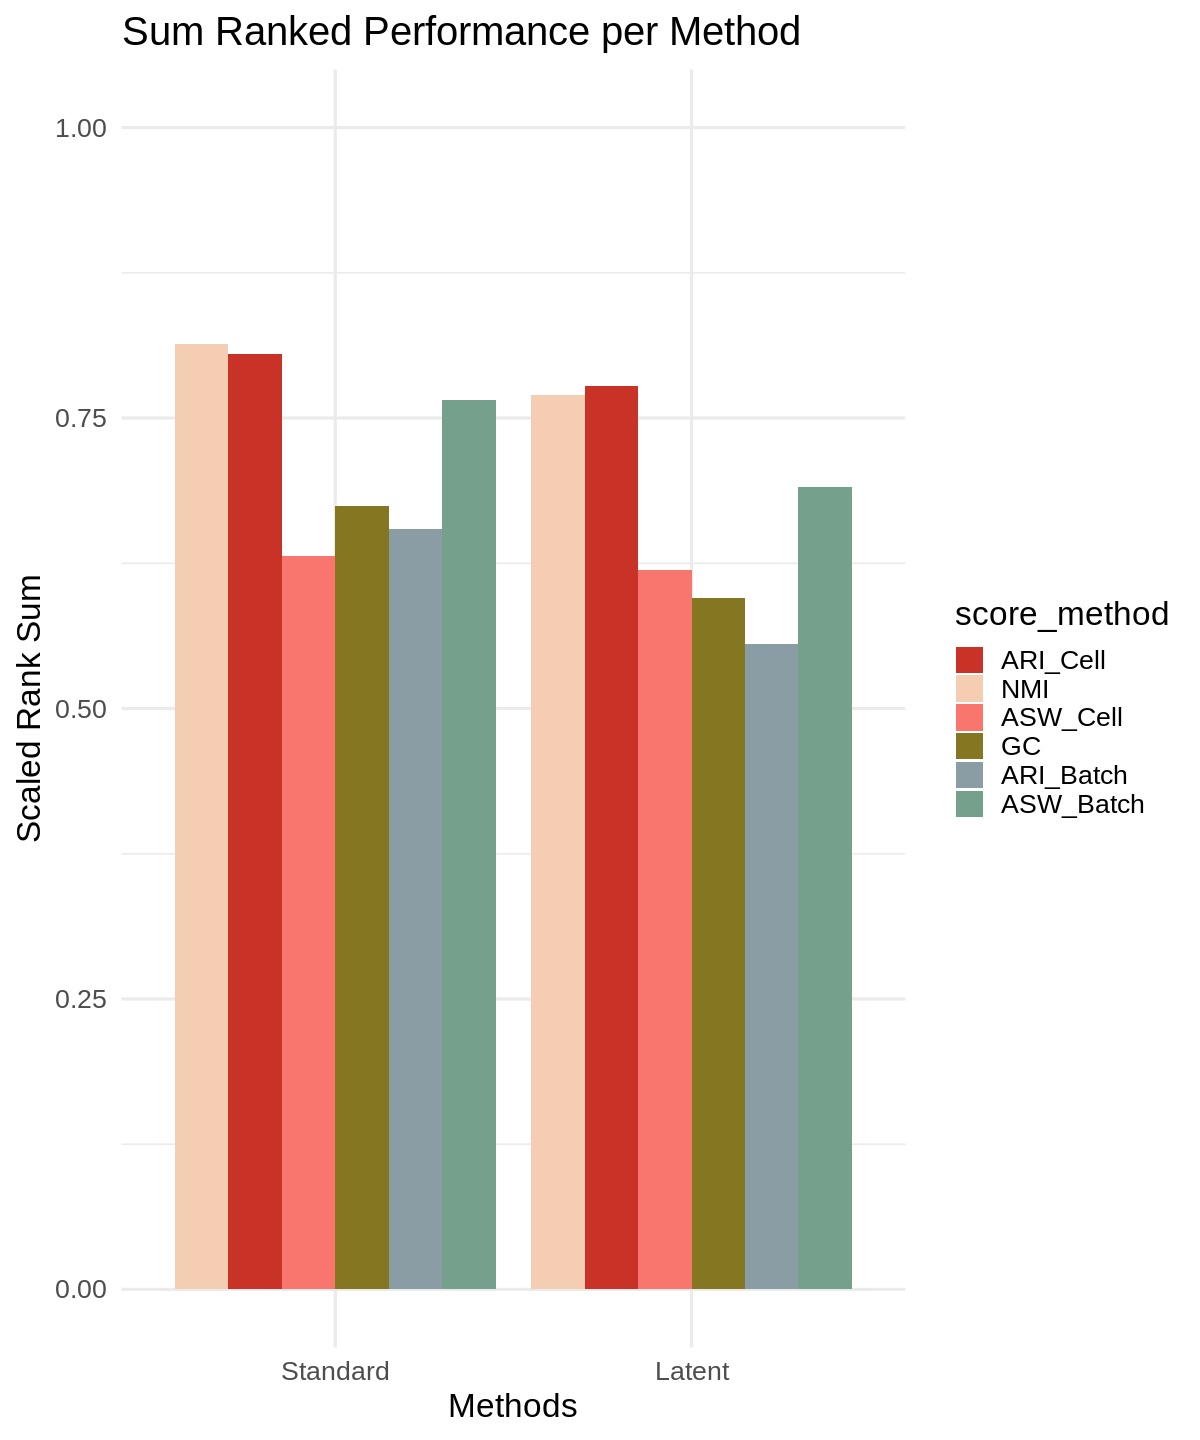

In [3]:
options(repr.plot.width = 10, repr.plot.height = 12)
p <- ggplot(dat, aes(x=Method, y=scaled_rank_sum, fill = score_method)) + 
  geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "Sum Ranked Performance per Method")) + scale_fill_manual(values = Metric_Colors[1:6]) + ylab("Scaled Rank Sum") + xlab("Methods") + ylim(0,1)
p

In [4]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.7    ggplot2_3.3.5  magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] pillar_1.6.4     compiler_4.1.2   base64enc_0.1-3  tools_4.1.2     
 [5] digest_0.6.28    uuid_1.0-3       jsonlite_1.7.2   evaluate_0.14   
 [9] lifecycle_1.0.1  tibble_3.